In [1]:
import numpy as np
import os
import torch
from torchvision.datasets import mnist
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torch import optim
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

1.12.0


In [ ]:
from __future__ import absolute_import, division, print_function

import time
# t0 = time.clock()

import pathlib
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import torch
import keras
import scipy.io as io
from keras import backend as K
from keras import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from keras import regularizers
from torch.nn import Linear
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.nn import Linear, ReLU

from torch_geometric.nn import Sequential, GCNConv, GATv2Conv, GATConv, SAGEConv
from torch_geometric.data import Data
from torch_geometric.nn import global_mean_pool


import matplotlib.pyplot as plt
from torch.autograd import Variable

In [ ]:
Edges_train = pd.read_excel('graph10.xlsx', sheet_name= 'Sheet2')
Edges_test = pd.read_excel('graph10.xlsx', sheet_name= 'Sheet4')
Edges_validation = pd.read_excel('graph10.xlsx', sheet_name= 'Sheet6')

dataset_train = pd.read_excel('graph10.xlsx', sheet_name= 'Train2')
dataset_test = pd.read_excel('graph10.xlsx', sheet_name = 'Test2')
dataset_validation = pd.read_excel('graph10.xlsx', sheet_name= 'Validation')

#one_hot_cols = pd.get_dummies(dataset_train['Flat Type'], prefix='Flat')
#dataset_train = dataset_train.drop(columns=['Flat Type'])
#dataset_train = pd.concat([one_hot_cols, dataset_train], axis=1)

#one_hot_cols = pd.get_dummies(dataset_test['Flat Type'], prefix='Flat')
#dataset_test = dataset_test.drop(columns=['Flat Type'])
#dataset_test = pd.concat([one_hot_cols, dataset_test], axis=1)

#one_hot_cols = pd.get_dummies(dataset_train['Room Type'], prefix='Room')
#dataset_train = dataset_train.drop(columns=['Room Type'])
#dataset_train = pd.concat([one_hot_cols, dataset_train], axis=1)

#one_hot_cols = pd.get_dummies(dataset_test['Room Type'], prefix='Room')
#dataset_test = dataset_test.drop(columns=['Room Type'])
#dataset_test = pd.concat([one_hot_cols, dataset_test], axis=1)

# one_hot_cols = pd.get_dummies(dataset_train['Wing Orientation'], prefix='Wing')
# dataset_train = dataset_train.drop(columns=['Wing Orientation'])
# dataset_train = pd.concat([one_hot_cols, dataset_train], axis=1)

# one_hot_cols = pd.get_dummies(dataset_test['Wing Orientation'], prefix='Wing')
# dataset_test = dataset_test.drop(columns=['Wing Orientation'])
# dataset_test = pd.concat([one_hot_cols, dataset_test], axis=1)

# one_hot_cols = pd.get_dummies(dataset_train['Flat Orientation'], prefix='Flat Orientation')
# dataset_train = dataset_train.drop(columns=['Flat Orientation'])
# dataset_train = pd.concat([one_hot_cols, dataset_train], axis=1)

# one_hot_cols = pd.get_dummies(dataset_test['Flat Orientation'], prefix='Flat Orientation')
# dataset_test = dataset_test.drop(columns=['Flat Orientation'])
# dataset_test = pd.concat([one_hot_cols, dataset_test], axis=1)

dataset_train.fillna(0, inplace=True)
dataset_test.fillna(0, inplace=True)
dataset_validation.fillna(0, inplace=True)

train_X = dataset_train.iloc[0:, :15]
train_Y = dataset_train.iloc[0:, 15:]

test_X = dataset_test.iloc[0:, :15]
test_Y = dataset_test.iloc[0:, 15:]

validation_X = dataset_validation.iloc[0:, :15]
validation_Y = dataset_validation.iloc[0:, 15:]

scalerX = StandardScaler().fit(train_X)
scalerY = StandardScaler().fit(train_Y)
train_X = scalerX.transform(train_X)
train_Y = scalerY.transform(train_Y)
test_X = scalerX.transform(test_X)
test_Y = scalerY.transform(test_Y)

validation_X = scalerX.transform(validation_X)
validation_Y = scalerY.transform(validation_Y)

edges_train = Edges_train.values - 1
edges_train = torch.from_numpy(edges_train).t()
edges_train = edges_train.long()

edges_test = Edges_test.values - 1
edges_test = torch.from_numpy(edges_test).t()
edges_test = edges_test.long()

edges_validation = Edges_validation.values - 1
edges_validation = torch.from_numpy(edges_validation).t()
edges_validation = edges_validation.long()

train = pd.concat([pd.DataFrame(train_X), pd.DataFrame(train_Y)], axis=1)
test = pd.concat([pd.DataFrame(test_X), pd.DataFrame(test_Y)], axis=1)
validation = pd.concat([pd.DataFrame(validation_X), pd.DataFrame(validation_Y)], axis=1)

train_X = torch.tensor(np.array(train_X.astype('f')))
train_Y = torch.tensor(np.array(train_Y.astype('f')))

test_X = torch.tensor(np.array(test_X.astype('f')))
test_Y = torch.tensor(np.array(test_Y.astype('f')))

validation_X = torch.tensor(np.array(validation_X.astype('f')))
validation_Y = torch.tensor(np.array(validation_Y.astype('f')))


train_data = Data(x = train_X, edge_index = edges_train, y = train_Y)
test_data = Data(x = test_X, edge_index = edges_test, y = test_Y)
validation_data = Data(x = validation_X, edge_index = edges_validation, y = validation_Y)

# ACH_MEAN = dataset_train.ACH.mean()
# ACH_var = dataset_train.ACH.var()
# ACH_Min = dataset_train.ACH.min()
# ACH_Max = dataset_train.ACH.max()
# CP_MEAN = dataset_train.CP.mean()
# CP_var = dataset_train.CP.var()
# CP_Min = dataset_train.CP.min()
# CP_Max = dataset_train.CP.max()


train_Y_mean = train_Y.mean()
train_Y_var = train_Y.var()


Epoch: 001, Train_Loss: 0.1216, Test_Loss: 0.1096, Train_Acc:0.0090, Test_Acc: 0.0000
Epoch: 002, Train_Loss: 0.2253, Test_Loss: 0.1110, Train_Acc:0.0867, Test_Acc: 0.1096
Epoch: 003, Train_Loss: 0.3016, Test_Loss: 0.1110, Train_Acc:0.0553, Test_Acc: 0.0482
Epoch: 004, Train_Loss: 0.1805, Test_Loss: 0.1066, Train_Acc:0.0484, Test_Acc: 0.0526
Epoch: 005, Train_Loss: 0.1022, Test_Loss: 0.1014, Train_Acc:0.0069, Test_Acc: 0.0022
Epoch: 006, Train_Loss: 0.0787, Test_Loss: 0.0973, Train_Acc:0.0149, Test_Acc: 0.0175
Epoch: 007, Train_Loss: 0.0791, Test_Loss: 0.0907, Train_Acc:0.0484, Test_Acc: 0.0439
Epoch: 008, Train_Loss: 0.0840, Test_Loss: 0.0832, Train_Acc:0.1027, Test_Acc: 0.1162
Epoch: 009, Train_Loss: 0.0819, Test_Loss: 0.0808, Train_Acc:0.1995, Test_Acc: 0.2039
Epoch: 010, Train_Loss: 0.0750, Test_Loss: 0.0790, Train_Acc:0.2314, Test_Acc: 0.2368
Epoch: 011, Train_Loss: 0.0624, Test_Loss: 0.0731, Train_Acc:0.2963, Test_Acc: 0.3004
Epoch: 012, Train_Loss: 0.0577, Test_Loss: 0.0687, Tra

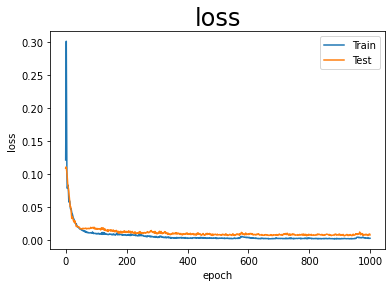

In [ ]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch': []}
        self.accuracy = {'batch': [], 'epoch': []}
        self.val_loss = {'batch': [], 'epoch': []}
        self.val_acc = {'batch': [], 'epoch': []}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        fig = plt.figure()
        # acc
        # plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            # plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type, FontSize=24)
        plt.ylabel('Loss', FontSize=24)
        plt.legend(loc="upper right", fontsize = 24)
        # plt.show()
        fig.set_size_inches(16, 9)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        fig.savefig('lossPlot', dpi=fig.dpi)

batch_size = 100
nb_classes = 1
nb_epoch = 1000

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234567)
        self.lin1 = Linear(33,256)
        self.lin2 = Linear(256,512)
        self.lin3 = Linear(512,256)
        self.lin4 = Linear(256,1)

        self.bnm1 = nn.BatchNorm1d(256, momentum=0.1)
        self.bnm2 = nn.BatchNorm1d(512, momentum=0.1)
        self.bnm3 = nn.BatchNorm1d(256, momentum=0.1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.lin1(x)
        x = self.bnm1(x)
        x = x.relu()
        x = self.dropout(x)
        x = self.lin2(x)
        x = self.bnm2(x)
        x = x.relu()
        x = self.lin3(x)
        x = self.bnm3(x)
        x = x.relu()
        x = self.lin4(x)      
        return x     


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(21, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 112)
        # self.conv2 = GCNConv(hidden_channels, 50)
        # self.lin1 = Linear(50,256)
        self.lin2 = Linear(112,256)
        self.lin3 = Linear(256,100)
        self.lin4 = Linear(100,1)

        self.bnm1 = nn.BatchNorm1d(112, momentum=0.1)
        self.bnm2 = nn.BatchNorm1d(256, momentum=0.1)
        self.bnm3 = nn.BatchNorm1d(100, momentum=0.1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        # x = F.dropout(x, p=0.1, training=self.training)
        # x = self.dropout(x)
        x = self.conv2(x, edge_index)
        # x = self.lin1(x)
        x = self.bnm1(x)
        x = x.relu()
        x = self.dropout(x)
        x = self.lin2(x)
        x = self.bnm2(x)
        x = x.relu()
        x = self.lin3(x)
        x = self.bnm3(x)
        x = x.relu()
        x = self.lin4(x)  
        return x

class GCN1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(15, 150)
        self.conv2 = GCNConv(150, 200)
        self.lin2 = Linear(200,400)
        self.lin3 = Linear(400,200)
        self.lin4 = Linear(200,1)

        self.pool1 = nn.MaxPool2d(2,2)

        self.bnm1 = nn.BatchNorm1d(200, momentum=0.1)
        self.bnm2 = nn.BatchNorm1d(400, momentum=0.1)
        self.bnm3 = nn.BatchNorm1d(200, momentum=0.1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        # x = F.dropout(x, p=0.1, training=self.training)
        x = self.conv2(x, edge_index)
        # x = self.lin1(x)
        x = self.bnm1(x)
        x = x.relu()
        x = self.dropout(x)
        x = self.lin2(x)
        x = self.bnm2(x)
        x = x.relu()
        # x = self.dropout(x)
        x = self.lin3(x)
        x = self.bnm3(x)
        x = x.relu()
        x = self.lin4(x)  
        return x


# print(model)
model = GCN1()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.025, weight_decay=1e-4)
optimizer = torch.optim.Adam(model.parameters(), lr=0.008, weight_decay=1e-4)
# criterion = torch.nn.MSELoss()
criterion = torch.nn.HuberLoss(reduction='mean',delta=0.15)

def train():
      model.to("cuda:0")
      train_data.to("cuda:0")
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(train_data.x, train_data.edge_index)
      #out = model(train_data.x)
      loss = criterion(out, train_data.y)  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

# lmbd = 0.01
# def train():
#       model.to("cuda:0")
#       train_data.to("cuda:0")
#       model.train()
#       optimizer.zero_grad()  # Clear gradients.
#       out = model(train_data.x, train_data.edge_index)
#       #out = model(train_data.x)
#       loss = criterion(out, train_data.y)  # Compute the loss solely based on the training nodes.
#       reg_loss = None
#       for param in model.parameters():
#           if reg_loss is None:
#               reg_loss = 0.5 * torch.sum(param**2)
#           else:
#               reg_loss = reg_loss + 0.5 * param.norm(2)**2

#       loss += lmbd * reg_loss
#       loss.backward()  # Derive gradients.
#       optimizer.step()  # Update parameters based on gradients.
#       return loss

def test():
      model.eval()
      test_data.to("cuda:0")
      #out = model(test_data.x)
      out = model(test_data.x, test_data.edge_index)
      loss = criterion(out, test_data.y)
      pred = out  # Use the class with highest probability.
      # train_correct = abs((pred-test_data.y/test_data.y))< 0.5  # Check against ground-truth labels.
      # train_acc = int(train_correct.sum()) / int(len(test_data)) 
      # loss.backward() 
      # optimizer.step()
      return loss

Train_losses = []
Test_losses = []

for epoch in range(1, 1001):
    Train_loss = train()
    Test_loss = test()
    model.eval()
    test_data.to("cuda:0")
    train_data.to("cuda:0")
    #test_predictions = model(test_data.x)
    test_predictions = model(test_data.x, test_data.edge_index)
    train_predictions = model(train_data.x, train_data.edge_index)
    # test_predictions_inverse = scalerY.inverse_transform(test_predictions.detach().numpy())
    test_correct = abs((test_predictions-test_data.y)/test_predictions) < 0.25  # Check against ground-truth labels.
    test_acc = int(test_correct.sum()) / len(test_predictions)
    train_correct = abs((train_predictions-train_data.y)/train_predictions) < 0.25  # Check against ground-truth labels.
    train_acc = int(train_correct.sum()) / len(train_predictions)
    Train_losses.append(Train_loss.detach().cpu().numpy())
    Test_losses.append(Test_loss.detach().cpu().numpy())
    
    print(f'Epoch: {epoch:03d}, Train_Loss: {Train_loss:.4f}, Test_Loss: {Test_loss:.4f}, Train_Acc:{train_acc:.4f}, Test_Acc: {test_acc:.4f}')
    # print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')


def draw_loss():
  plt.figure()
  plt.title('loss',fontsize=24)
  plt.plot(Train_losses,'-')
  plt.plot(Test_losses,'-')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train','Test'])
  plt.show

draw_loss()


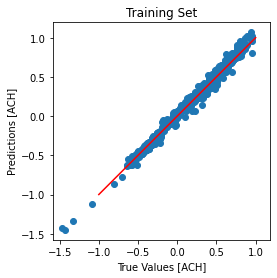

In [ ]:
model.eval()
train_predictions = model(train_data.x, train_data.edge_index)
# train_predictions = model(train_data.x)
train_predictions_inverse = scalerY.inverse_transform(train_predictions.detach().cpu().numpy())
train_Y_inverse = scalerY.inverse_transform(train_Y)
prediction_frame = pd.DataFrame(train_predictions_inverse, index=dataset_train.index)
test_2 = pd.concat([pd.DataFrame(test_X), pd.DataFrame(train_Y)], axis=1)
result = pd.concat([test_2, prediction_frame], axis=1)
result.rename(columns={0:'Prediction'},inplace = True)
# result = test.join(prediction_frame)
# pd.merge(test, prediction_frame, left_index=True)
result.to_csv('result_Analysis_MAE_train.csv')

writer = pd.ExcelWriter('result_analysis_train.xlsx')
result.to_excel(writer, 'Sheet1')
writer.save()

fig = plt.figure()
plt.title('Training Set')
plt.scatter(train_Y_inverse, train_predictions_inverse)
plt.xlabel('True Values [ACH]')
plt.ylabel('Predictions [ACH]')
x = np.linspace(-1,1)
y = x
plt.plot(x, y, '-r', label='y=x')
plt.axis('equal')
plt.axis('square')
# plt.show()
fig.set_size_inches(6, 4)
fig.savefig('Training set.png', dpi=fig.dpi)
# plt.xlim([-0.1, 55])
# plt.ylim([-0.1, 55])
# _ = plt.plot([-100, 100], [-100, 100])

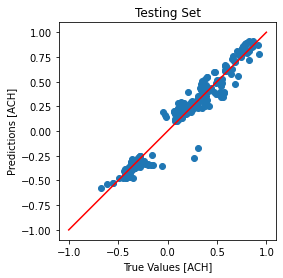

In [ ]:
model.eval()
test_predictions = model(test_data.x, test_data.edge_index)
# test_predictions = model(test_data.x)
test_predictions_inverse = scalerY.inverse_transform(test_predictions.detach().cpu().numpy())
test_Y_inverse = scalerY.inverse_transform(test_Y)
prediction_frame = pd.DataFrame(test_predictions_inverse, index=dataset_test.index)
# test_2 = pd.concat([pd.DataFrame(test_X.detach().numpy()), pd.DataFrame(test_Y.detach().numpy())], axis=1)
result = pd.concat([dataset_test, prediction_frame], axis=1)
result.rename(columns={0:'Prediction'},inplace = True)
# result = test.join(prediction_frame)
# pd.merge(test, prediction_frame, left_index=True)
result.to_csv('result_Analysis_MAE.csv')

writer = pd.ExcelWriter('result_analysis.xlsx')
result.to_excel(writer, 'Sheet1')
writer.save()

fig = plt.figure()
plt.title('Testing Set')
plt.scatter(test_Y_inverse, test_predictions_inverse)
plt.xlabel('True Values [ACH]')
plt.ylabel('Predictions [ACH]')
x = np.linspace(-1,1)
y = x
plt.plot(x, y, '-r', label='y=x')
plt.axis('equal')
plt.axis('square')
# plt.show()
fig.set_size_inches(6, 4)
fig.savefig('MAE.png', dpi=fig.dpi)
# plt.xlim([-0.1, 55])
# plt.ylim([-0.1, 55])
# _ = plt.plot([-100, 100], [-100, 100])

In [ ]:
def train_and_pred(validation_data, validation_labels):
  model.cpu()
  preds = model(validation_data.x, validation_data.edge_index)
  preds = scalerY.inverse_transform(preds.detach().numpy())
  validation_labels['Cp'] = pd.Series(preds[:,0].reshape(1, -1)[0])
  submission = pd.concat([validation_labels['Id'], validation_labels['Cp']], axis=1)
  submission.to_csv('./Validation Results.csv', index=False)

In [ ]:
validation_labels = pd.DataFrame(scalerY.inverse_transform(validation_Y.detach().numpy()))
validation_labels.columns = ['Id']
train_and_pred(validation_data, validation_labels)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def drawComparison (ACH, PRED):
    fig = plt.figure()
    plt.title('Testing Set', FontSize=24)
    plt.scatter(ACH, PRED)
    plt.xlabel('True Values [ACH]', FontSize=24)
    plt.ylabel('Predictions [ACH]', FontSize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    x = np.linspace(-5,60,20)
    y = x
    plt.plot(x, y, '-r', label='y=x')
    plt.axis('equal')
    plt.axis('square')

    fig.set_size_inches(16, 9)
    fig.savefig('comparison', dpi=fig.dpi)

MAE = pd.read_csv('result_Analysis_MAE.csv')
# ACH_MAE = MAE['ACH']
ACH_MAE = MAE['W1 Cp']
PRED_MAE = MAE['Prediction']
absolute_diff_MAE = abs(ACH_MAE-PRED_MAE)
absolute_percentage_diff_MAE = abs(ACH_MAE-PRED_MAE)/abs(ACH_MAE)
drawComparison(ACH_MAE, PRED_MAE)

# Rating_GT = MAE['ACH']
# Rating_Pred = MAE['ACH']
# is_equal = MAE['ACH']
Rating_GT = MAE['W1 Cp']
Rating_Pred = MAE['W1 Cp']
is_equal = MAE['W1 Cp']

Output = pd.concat([ACH_MAE, PRED_MAE, absolute_diff_MAE, 
                    absolute_percentage_diff_MAE, Rating_GT, Rating_Pred, is_equal],axis=1,ignore_index=True)
# Output.columns=['ACH','PRED_MAE','absolute_diff_MAE',
                              # 'absolute_percentage_diff_MAE','Rating_GT', 'Rating_Pred']

Output.columns=['ACH','PRED_MAE','absolute_diff_MAE',
                              'absolute_percentage_diff_MAE','Rating_GT', 'Rating_Pred','is_equal']

# Output.loc[Output['ACH'] <=5, 'Rating_GT'] = 0
# Output.loc[(Output['ACH'] >5) & (Output['ACH'] <=10), 'Rating_GT'] = 1
# Output.loc[(Output['ACH'] >10) & (Output['ACH'] <=30), 'Rating_GT'] = 2
# Output.loc[(Output['ACH'] >30) & (Output['ACH'] <=70), 'Rating_GT'] = 3
# # Output.loc[(Output['ACH'] >44) & (Output['ACH'] <=70), 'Rating_GT'] = 4
# Output.loc[Output['ACH'] >70, 'Rating_GT'] = 4

# Output.loc[Output['PRED_MAE'] <=5, 'Rating_Pred'] = 0
# Output.loc[(Output['PRED_MAE'] >5) & (Output['PRED_MAE'] <=10), 'Rating_Pred'] = 1
# Output.loc[(Output['PRED_MAE'] >10) & (Output['PRED_MAE'] <=30), 'Rating_Pred'] = 2
# Output.loc[(Output['PRED_MAE'] >30) & (Output['PRED_MAE'] <=70), 'Rating_Pred'] = 3
# # Output.loc[(Output['PRED_MAE'] >44) & (Output['PRED_MAE'] <=70), 'Rating_Pred'] = 4
# Output.loc[Output['PRED_MAE'] >70, 'Rating_Pred'] = 4

# Output.loc[Output['ACH'] <=4, 'Rating_GT'] = 0
# Output.loc[(Output['ACH'] >4) & (Output['ACH'] <=8), 'Rating_GT'] = 1
# Output.loc[(Output['ACH'] >8) & (Output['ACH'] <=16), 'Rating_GT'] = 2
# Output.loc[Output['ACH'] >16, 'Rating_GT'] = 3
# Output.loc[Output['PRED_MAE'] <=4, 'Rating_Pred'] = 0
# Output.loc[(Output['PRED_MAE'] >4) & (Output['PRED_MAE'] <=8), 'Rating_Pred'] = 1
# Output.loc[(Output['PRED_MAE'] >8) & (Output['PRED_MAE'] <=16), 'Rating_Pred'] = 2
# Output.loc[Output['PRED_MAE'] >16, 'Rating_Pred'] = 3

# Output.loc[Output['Rating_GT'] == Output['Rating_Pred'], 'is equal'] = 1
# count_Pred = Output['Rating_Pred'].value_counts()
# count_GT = Output['Rating_GT'].value_counts()

Output.to_csv('PaperResult.csv')

KeyError: ignored

In [ ]:
true_count = 0
total_count = len(Output['Rating_GT'])
for i in range(total_count):
  if Output['Rating_GT'].iloc[i] == Output['Rating_Pred'].iloc[i]:
    true_count += 1
true_percent = true_count/total_count

print(true_percent)

NameError: ignored